In [3]:
import numpy as np
import pandas as pd
import sys
sys.path.append('C:\Machine Learning\mylib' )
import ClassificationTree, RegressionTree
import matplotlib.pyplot as plt
import sklearn.metrics as m

Задание 1

In [38]:
df_classif = pd.read_csv('../datasets/csgo_task_pred.csv')
df_regress = pd.read_csv('../datasets/trip_duration_task_pred.csv')
X_classif = df_classif.drop(['bomb_planted'], axis=1)
y_classif = df_classif['bomb_planted']
X_regress = df_regress.drop(['trip_duration','dropoff_datetime'], axis=1)
y_regress = df_regress['trip_duration']

In [39]:
from sklearn.model_selection import train_test_split
X_train_classif, X_test_classif, y_train_classif, y_test_classif = train_test_split(X_classif, y_classif, test_size=0.2)
X_train_regress, X_test_regress, y_train_regress, y_test_regress = train_test_split(X_regress, y_regress, test_size=0.2)

Простое обучение регрессора и классификатора

In [40]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
tree_classif = DecisionTreeClassifier(max_depth=5).fit(X_train_classif, y_train_classif)
tree_regress = DecisionTreeRegressor(max_depth=5).fit(X_train_regress, y_train_regress)

In [41]:
y_pred_classif = tree_classif.predict(X_test_classif)
y_pred_regress = tree_regress.predict(X_test_regress)

In [42]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test_regress, y_pred_regress)}')
print(f'MSE: {mean_squared_error(y_test_regress, y_pred_regress)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_regress, y_pred_regress))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_regress, y_pred_regress))}')
print(f'R^2: {tree_regress.score(X_test_regress, y_test_regress)}')

MAE: 527.0411647512722
MSE: 9691537.244919408
RMSE: 3113.12339057086
MAPE: 1.1681002509212415
R^2: 0.018960198280845497


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21713
           1       0.87      0.95      0.91      2727

    accuracy                           0.98     24440
   macro avg       0.93      0.97      0.95     24440
weighted avg       0.98      0.98      0.98     24440



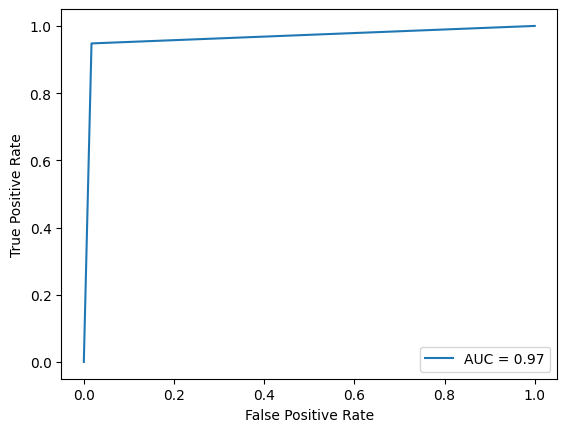

In [43]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classif, y_pred_classif))

fpr, tpr, thresholds = m.roc_curve(y_test_classif, y_pred_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Обучение классификатора после даунсемплинга и масштабирования 

In [11]:
bomb_planted = df_classif[df_classif["bomb_planted"] == 1]
bomb_not_planted  = df_classif[df_classif["bomb_planted"] == 0]
from sklearn.utils import resample
bomb_not_planted = resample(bomb_not_planted,
             replace=True,
             n_samples=len(bomb_planted),
             random_state=42)
bomb_not_planted.shape
df1 = pd.concat([bomb_not_planted, bomb_planted])
y = df1["bomb_planted"]
X = df1.drop(["bomb_planted"], axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()
X_train_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_train))
X_test_minmax = pd.DataFrame(min_max_scaler.fit_transform(X_test))

              precision    recall  f1-score   support

           0       0.98      0.95      0.97      2753
           1       0.95      0.98      0.97      2712

    accuracy                           0.97      5465
   macro avg       0.97      0.97      0.97      5465
weighted avg       0.97      0.97      0.97      5465



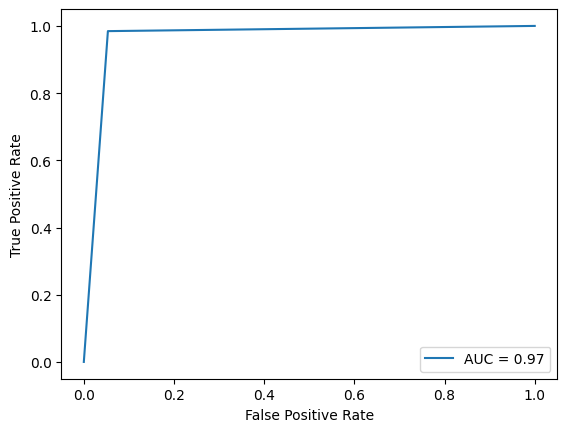

In [12]:
tree_classif = DecisionTreeClassifier(max_depth=5).fit(X_train_minmax, y_train)
y_pred_classif = tree_classif.predict(X_test_minmax)
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_classif))

fpr, tpr, thresholds = m.roc_curve(y_test, y_pred_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Задание 2

Bagging

In [28]:
from sklearn.ensemble import BaggingClassifier, BaggingRegressor
bag_classif = BaggingClassifier(estimator=DecisionTreeClassifier(max_depth=5),
                                n_estimators=200,
                                max_features=10,
                                max_samples=200,).fit(X_train_classif, y_train_classif)
bag_regress = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=5),
                                n_estimators=100,
                                max_features=5,
                                max_samples=100,).fit(X_train_regress, y_train_regress)

In [14]:
y_pred_bag_classif = bag_classif.predict(X_test_classif)
y_pred_bag_regress = bag_regress.predict(X_test_regress)

In [15]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test_regress, y_pred_bag_regress)}')
print(f'MSE: {mean_squared_error(y_test_regress, y_pred_bag_regress)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_regress, y_pred_bag_regress))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_regress, y_pred_bag_regress))}')
print(f'R^2: {bag_regress.score(X_test_regress, y_test_regress)}')

MAE: 571.5987331532464
MSE: 10228408.988818407
RMSE: 3198.1883917021537
MAPE: 1.2539475620678133
R^2: 0.007215382306360096


              precision    recall  f1-score   support

           0       0.96      0.99      0.97     21628
           1       0.86      0.69      0.77      2812

    accuracy                           0.95     24440
   macro avg       0.91      0.84      0.87     24440
weighted avg       0.95      0.95      0.95     24440



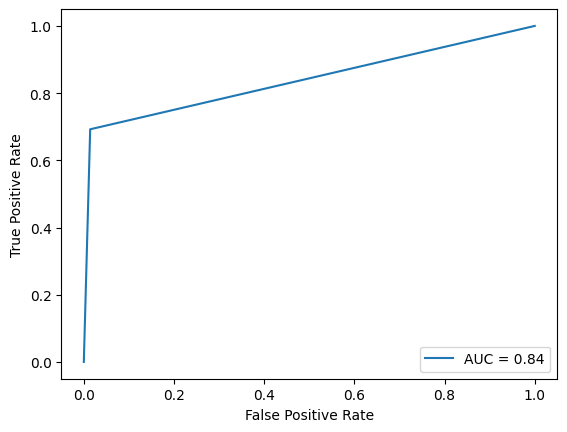

In [16]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classif, y_pred_bag_classif))

fpr, tpr, thresholds = m.roc_curve(y_test_classif, y_pred_bag_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

GradientBoosting

In [17]:
from sklearn.ensemble import GradientBoostingClassifier, GradientBoostingRegressor

In [18]:
boost_classif = GradientBoostingClassifier(
                                learning_rate = 0.1,
                                n_estimators = 100,
                                subsample = 0.1,).fit(X_train_classif, y_train_classif)
boost_regress = GradientBoostingRegressor(
                                learning_rate = 0.1,
                                n_estimators = 100,
                                subsample = 0.1,).fit(X_train_regress, y_train_regress)

In [19]:
y_pred_boost_classif = boost_classif.predict(X_test_classif)
y_pred_boost_regress = boost_regress.predict(X_test_regress)

In [20]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test_regress, y_pred_boost_regress)}')
print(f'MSE: {mean_squared_error(y_test_regress, y_pred_boost_regress)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_regress, y_pred_boost_regress))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_regress, y_pred_boost_regress))}')
print(f'R^2: {boost_regress.score(X_test_regress, y_test_regress)}')

MAE: 544.1039423419562
MSE: 13787516.858719418
RMSE: 3713.1545697317015
MAPE: 1.282254339240224
R^2: -0.33823693093344187


              precision    recall  f1-score   support

           0       0.99      0.99      0.99     21628
           1       0.90      0.95      0.92      2812

    accuracy                           0.98     24440
   macro avg       0.94      0.97      0.96     24440
weighted avg       0.98      0.98      0.98     24440



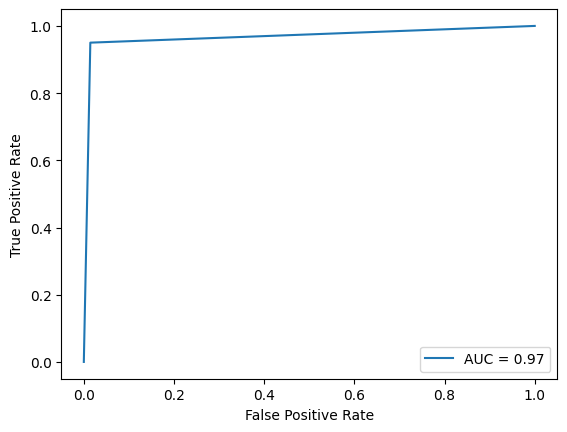

In [21]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classif, y_pred_boost_classif))

fpr, tpr, thresholds = m.roc_curve(y_test_classif, y_pred_boost_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

In [22]:
from sklearn.ensemble import StackingClassifier, StackingRegressor
stack_classif = StackingClassifier(estimators = [('dst',DecisionTreeClassifier(max_depth=5))],n_jobs=-1).fit(X_train_classif, y_train_classif)
stack_regress = StackingRegressor(estimators = [('dst',DecisionTreeRegressor(max_depth=5))], n_jobs=-1).fit(X_train_regress, y_train_regress)

In [24]:
y_pred_stack_classif = stack_classif.predict(X_test_classif)
y_pred_stack_regress = stack_regress.predict(X_test_regress)

In [25]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test_regress, y_pred_stack_regress)}')
print(f'MSE: {mean_squared_error(y_test_regress, y_pred_stack_regress)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_regress, y_pred_stack_regress))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_regress, y_pred_stack_regress))}')
print(f'R^2: {stack_regress.score(X_test_regress, y_test_regress)}')

MAE: 617.5501184161618
MSE: 10292214.941139298
RMSE: 3208.148210594283
MAPE: 1.2666133336978784
R^2: 0.0010222814975516803


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21628
           1       0.88      0.93      0.91      2812

    accuracy                           0.98     24440
   macro avg       0.94      0.96      0.95     24440
weighted avg       0.98      0.98      0.98     24440



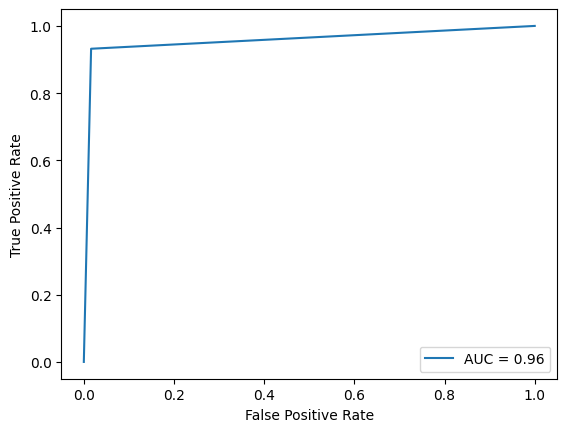

In [26]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classif, y_pred_stack_classif))

fpr, tpr, thresholds = m.roc_curve(y_test_classif, y_pred_stack_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Задание 3

In [28]:
from catboost import CatBoostRegressor, CatBoostClassifier

In [34]:
cat_boost_regr = CatBoostRegressor(depth=5,iterations=3).fit(X_train_regress, y_train_regress)
cat_boost_class = CatBoostClassifier(depth=5,iterations=3).fit(X_train_classif,y_train_classif)

Learning rate set to 0.5
0:	learn: 4031.7739046	total: 98.6ms	remaining: 197ms
1:	learn: 3837.2137318	total: 203ms	remaining: 102ms
2:	learn: 3682.4494387	total: 296ms	remaining: 0us
Learning rate set to 0.5
0:	learn: 0.1145756	total: 30.1ms	remaining: 60.2ms
1:	learn: 0.0891206	total: 61ms	remaining: 30.5ms
2:	learn: 0.0677524	total: 93.2ms	remaining: 0us


In [35]:
y_pred_cat_classif = cat_boost_class.predict(X_test_classif)
y_pred_cat_regress = cat_boost_regr.predict(X_test_regress)

In [36]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test_regress, y_pred_cat_regress)}')
print(f'MSE: {mean_squared_error(y_test_regress, y_pred_cat_regress)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test_regress, y_pred_cat_regress))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test_regress, y_pred_cat_regress))}')
print(f'R^2: {cat_boost_regr.score(X_test_regress, y_test_regress)}')

MAE: 522.2018881934395
MSE: 8818922.466984775
RMSE: 2969.6670633228864
MAPE: 1.1859247406015259
R^2: 0.018154817197234552


              precision    recall  f1-score   support

           0       0.99      0.98      0.99     21713
           1       0.87      0.91      0.89      2727

    accuracy                           0.97     24440
   macro avg       0.93      0.95      0.94     24440
weighted avg       0.98      0.97      0.97     24440



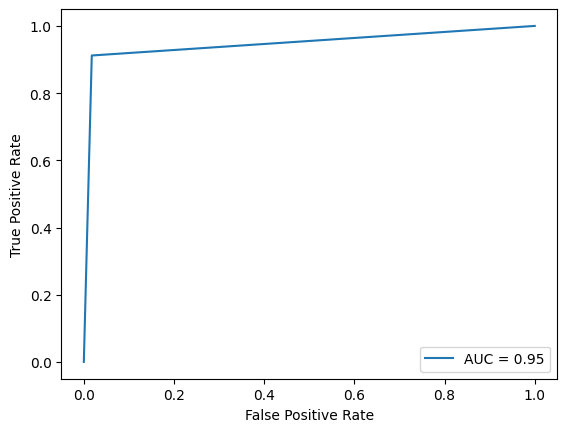

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test_classif, y_pred_cat_classif))

fpr, tpr, thresholds = m.roc_curve(y_test_classif, y_pred_cat_classif)
roc_auc = m.auc(fpr, tpr)
display =m.RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
display.plot()

Задание 4

In [53]:
df1_classif = df_classif.sample(n=100)
df1_regress = df_regress.sample(n=100)
X_classif1 = df1_classif.drop(['bomb_planted'], axis=1)
y_classif1 = df1_classif['bomb_planted']
X_regress1 = df1_regress.drop(['trip_duration','dropoff_datetime'], axis=1)
y_regress1 = df1_regress['trip_duration']
from sklearn.model_selection import train_test_split
X_train1_classif, X_test1_classif, y_train1_classif, y_test1_classif = train_test_split(X_classif1, y_classif1, test_size=0.2)
X_train1_regress, X_test1_regress, y_train1_regress, y_test1_regress = train_test_split(X_regress1, y_regress1, test_size=0.2)

In [54]:
classif_tree = ClassificationTree.ClassificationTree(3)
classif_tree.fit(pd.concat([X_train1_classif, y_train1_classif], axis=1))
y_classif_pred = classif_tree.predict(X_test1_classif)

        Unnamed: 0  time_left  ct_score  t_score  ct_health  t_health  \
118698    118906.0     174.96      13.0     10.0      500.0     500.0   
27461      27509.0      14.92       9.0      9.0      313.0     195.0   
61225      61344.0      94.95       6.0     11.0      380.0     343.0   
46354      46446.0     114.94      13.0      6.0      500.0     500.0   
92238      92404.0     174.91       0.0      2.0      500.0     500.0   
...            ...        ...       ...      ...        ...       ...   
42975      43060.0      14.93      12.0      0.0      300.0     139.0   
61312      61431.0      74.95       3.0      0.0      400.0     378.0   
107844    108035.0     114.93       2.0      3.0      500.0     500.0   
81988      82142.0      94.95      12.0      9.0      500.0     500.0   
8992        9009.0     166.95       4.0      3.0      500.0     500.0   

        ct_armor  t_armor  ct_money  t_money  ...  t_players_alive  \
118698     199.0      0.0   27550.0  37450.0  ...    

In [55]:
from sklearn.metrics import classification_report
print(classification_report(y_test1_classif, y_classif_pred))


              precision    recall  f1-score   support

           0       1.00      0.89      0.94        18
           1       0.50      1.00      0.67         2

    accuracy                           0.90        20
   macro avg       0.75      0.94      0.80        20
weighted avg       0.95      0.90      0.91        20



In [24]:
regress_tree = RegressionTree.RegressionTree(3)
regress_tree.fit(pd.concat([X_train1_regress, y_train1_regress], axis=1))
y_regress_pred = regress_tree.predict(X_test1_regress)

        Unnamed: 0  vendor_id  pickup_datetime  passenger_count  \
466740    466740.0        1.0     1.467196e+18              1.0   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
466740        -73.981689        40.762337         -73.783882   

        dropoff_latitude  trip_duration  
466740         40.643848         2603.0  
       Unnamed: 0  vendor_id  pickup_datetime  passenger_count  \
71335     71335.0        2.0     1.457353e+18              2.0   

       pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
71335        -73.960381        40.779823         -73.790314         40.646809   

       trip_duration  
71335         2702.0  
        Unnamed: 0  vendor_id  pickup_datetime  passenger_count  \
182156    182156.0        2.0     1.461855e+18              2.0   

        pickup_longitude  pickup_latitude  dropoff_longitude  \
182156        -73.974968        40.759079          -74.01252   

        dropoff_latitude  trip_duration  
1821

In [26]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt
print(f'MAE: {mean_absolute_error(y_test1_regress, y_regress_pred)}')
print(f'MSE: {mean_squared_error(y_test1_regress, y_regress_pred)}')
print(f'RMSE: {sqrt(mean_squared_error(y_test1_regress, y_regress_pred))}')
print(f'MAPE: {sqrt(mean_absolute_percentage_error(y_test1_regress, y_regress_pred))}')

MAE: 666.2255485893417
MSE: 1365794.5410359679
RMSE: 1168.6721272606649
MAPE: 1.1324388094564566
